## pie (by Hanif)

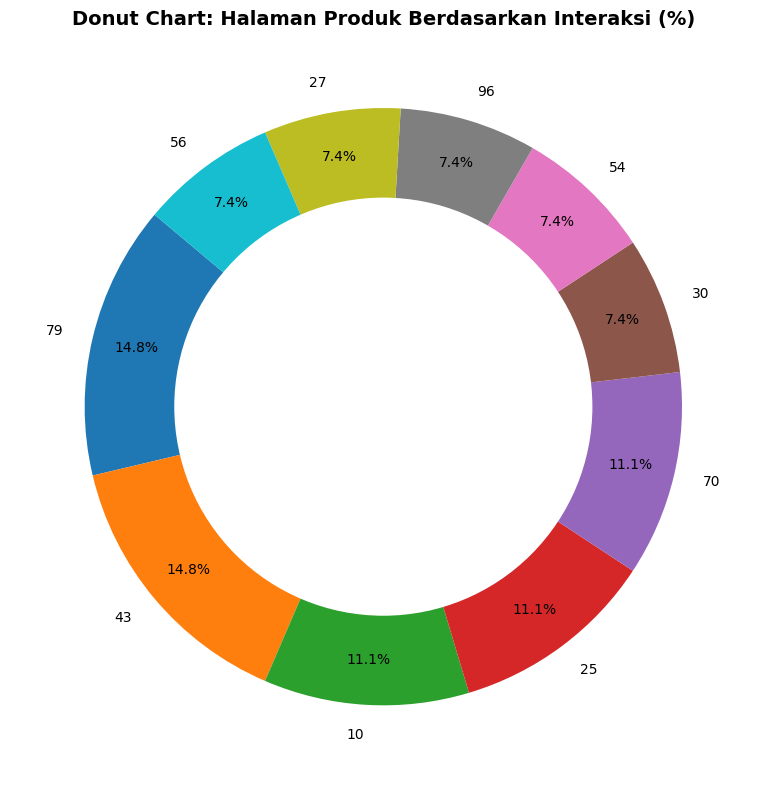

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ambil 10 page teratas
# Load file order_meta.csv
order_meta = pd.read_csv("csv/order_meta.csv", sep=";")

# Filter baris dengan meta_key '_wc_order_attribution_session_pages'
page_data = order_meta[order_meta["meta_key"] == "_wc_order_attribution_session_pages"]

# Hitung jumlah interaksi tiap halaman (meta_value dianggap sebagai URL/page)
page_counts = page_data["meta_value"].value_counts().reset_index()
page_counts.columns = ["page", "interaction_count"]


top_pages = page_counts.head(10).copy()

# Hitung total untuk persentase
total_interactions = top_pages["interaction_count"].sum()
top_pages["percentage"] = (top_pages["interaction_count"] / total_interactions) * 100

# Donut chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    top_pages["percentage"],
    labels=top_pages["page"],
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85
)

# Donut hole
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Donut Chart: Halaman Produk Berdasarkan Interaksi (%)", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

# by Carsen

DF: 200 rows x 19 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   order_id             200 non-null    int64 
 1   order_date           200 non-null    object
 2   total_amount         200 non-null    object
 3   product_id           200 non-null    int64 
 4   order_item_name      200 non-null    object
 5   total_sales          200 non-null    int64 
 6   order_item_type      200 non-null    object
 7   product_qty          200 non-null    int64 
 8   product_net_revenue  200 non-null    int64 
 9   shipping_amount      200 non-null    int64 
 10  customer_id          200 non-null    int64 
 11  first_name           200 non-null    object
 12  last_name            200 non-null    object
 13  email                200 non-null    object
 14  country              200 non-null    object
 15  city                 200 non-nu

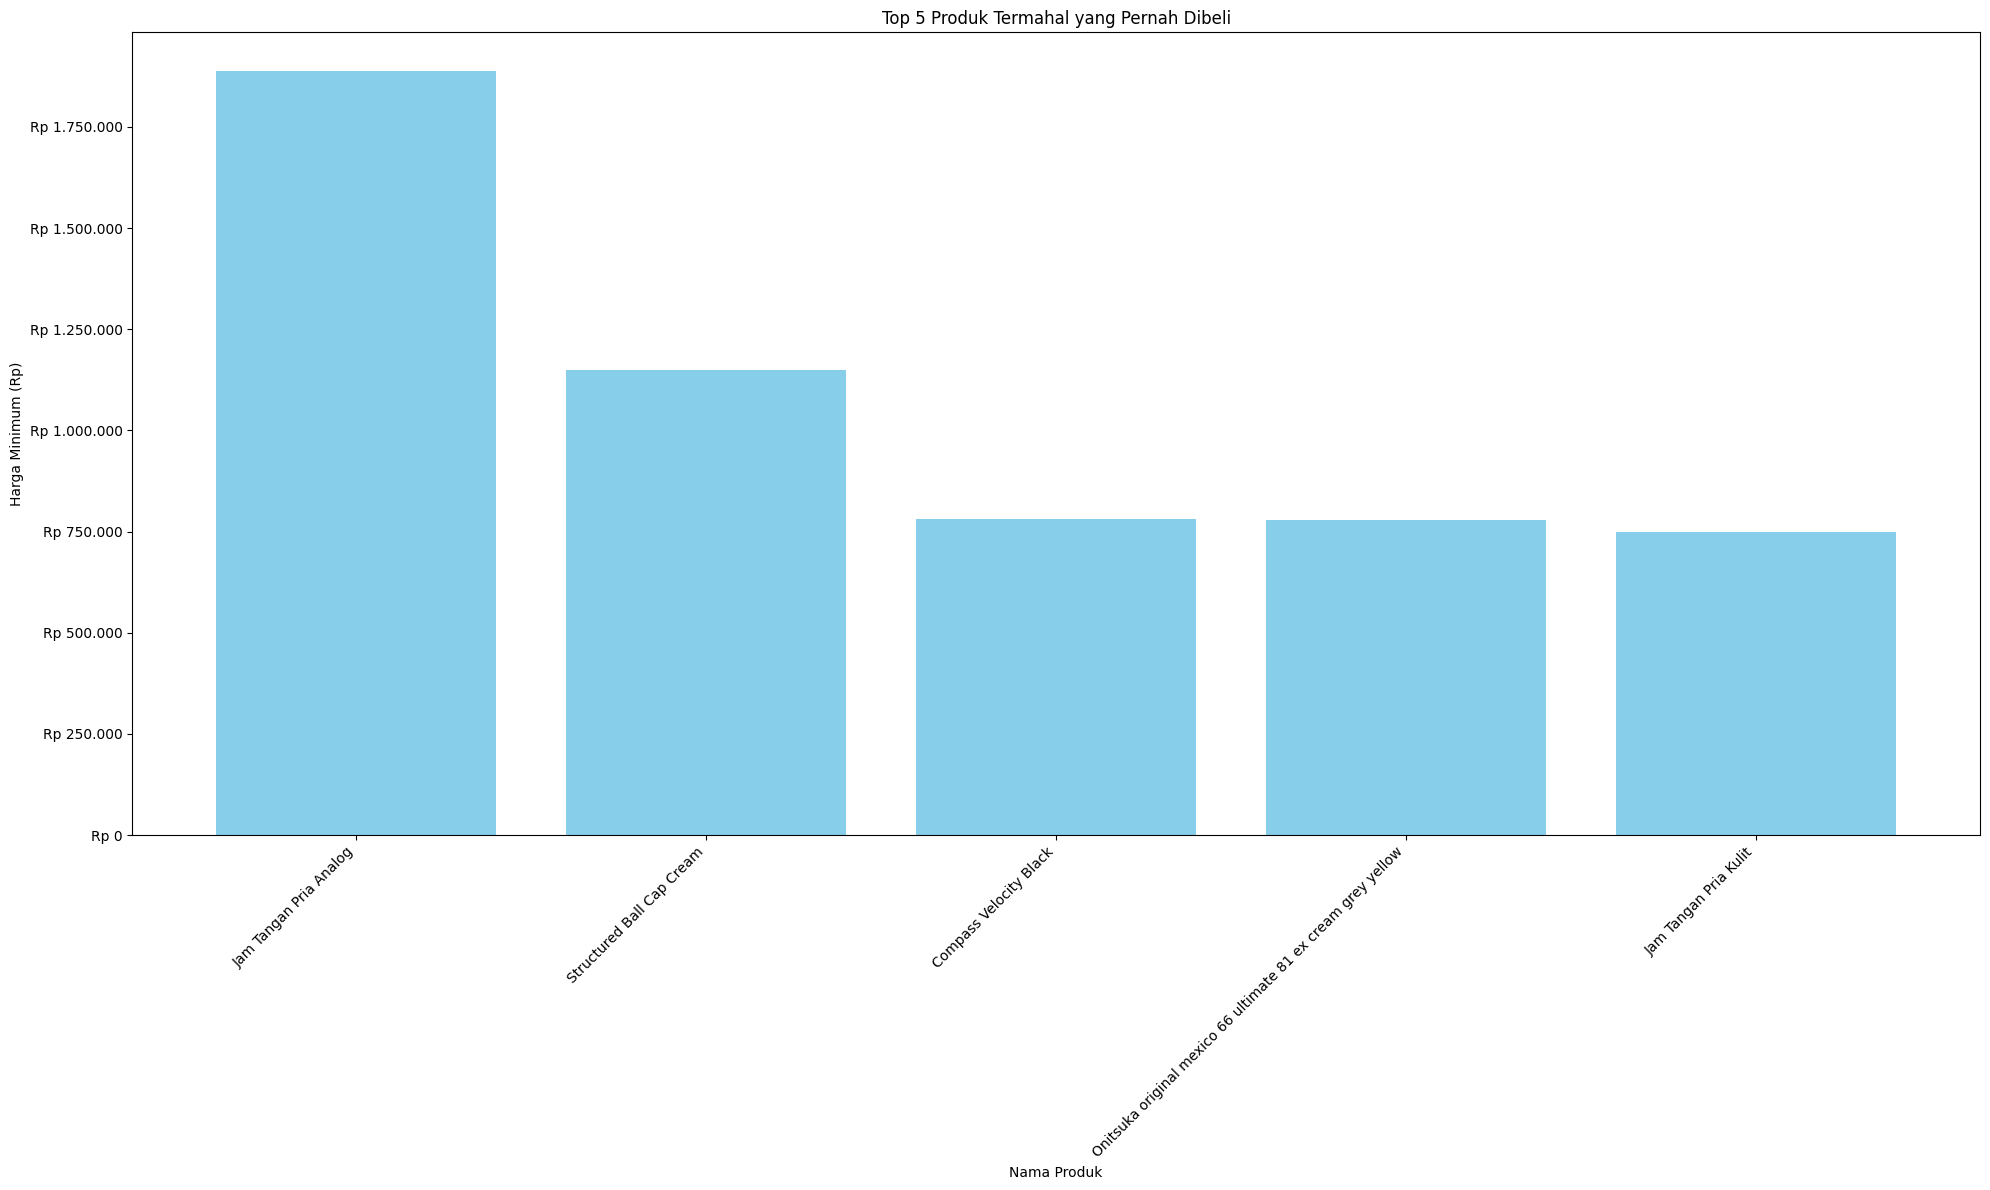

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#load dan proses data sales
df = pd.read_csv('csv/fact_sales_v2.csv', sep=';')
print(f"DF: {df.shape[0]} rows x {df.shape[1]} columns")
df.info() # tipe data sesuai (object bisa diubah ke category)
df.head()
df.describe().T # nilai right skewed

print(df.duplicated().sum()) # no duplicate
print(df.isna().sum()) # no missing value

# Baca file dengan delimiter titik koma
df_product = pd.read_csv("csv/product_meta.csv", delimiter=';')
df_sales = pd.read_csv("csv/fact_sales_v2.csv", delimiter=';')

# Bersihkan spasi di nama kolom
df_product.columns = df_product.columns.str.strip()
df_sales.columns = df_sales.columns.str.strip()

# Pastikan kolom product_id sudah sesuai
print("Kolom df_sales:", df_sales.columns.tolist())
print("Kolom df_product:", df_product.columns.tolist())

# Ubah tipe kolom agar bisa digabung
df_sales['product_id'] = df_sales['product_id'].astype(int)
df_product['product_id'] = df_product['product_id'].astype(int)

# Gabungkan kedua DataFrame
df_merged = pd.merge(df_sales, df_product, on='product_id', how='left')
print(df_merged.head())

# Salin dataframe
df_price = df_merged.copy()

# Konversi 'min_price' menjadi float, ganti koma → titik
df_price['min_price'] = pd.to_numeric(
    df_price['min_price'].astype(str).str.replace(',', '.', regex=False),
    errors='coerce'
)

# Ambil 5 produk unik dengan harga tertinggi
top_expensive = (
    df_price[['order_item_name', 'min_price']]
    .dropna()
    .drop_duplicates(subset='order_item_name')
    .sort_values(by='min_price', ascending=False)
    .head(5)
)

# Buat bar chart
plt.figure(figsize=(20, 12))
bars = plt.bar(top_expensive['order_item_name'], top_expensive['min_price'], color='skyblue')
plt.title("Top 5 Produk Termahal yang Pernah Dibeli")
plt.xlabel("Nama Produk")
plt.ylabel("Harga Minimum (Rp)")
plt.xticks(rotation=45, ha='right')

# Format sumbu Y menjadi format Rupiah
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"Rp {x:,.0f}".replace(",", ".")))

plt.tight_layout()
plt.show()